# Día 4 – EDA & Casting avanzado 🛫✨  
**Dataset:** *Airline Passenger Satisfaction*  
**URL directa:** `https://raw.githubusercontent.com/wessamsw/Airline_Passenger_Satisfaction/main/airline_passenger_satisfaction.csv`  

En esta sesión profundizarás en un Análisis Exploratorio de Datos (EDA) completo **+** conversión de tipos.  
Cada bloque sigue el formato TDAH‑friendly:

| Paso | Contenido |
|------|-----------|
| 📋 **Tarea** | Qué debes hacer (con subtareas numeradas). |
| 🎯 **Por qué lo haces** | Impacto directo o beneficio para CX / Data Science. |
| 🧠 **Lógica** | Mini recordatorio teórico. |
| 🔧 **Ejercicio** | Celda con `TODO:` para completar. |
| 🔍 **Solución comentada** | Oculta por defecto. |
| ✅ **Validación** | Tests automáticos. |
| 💡 **Reflexión** | Cierra con tu insight personal. |


## Paso 1 – Cargar datos & info inicial


| Sección | Contenido |
|---------|-----------|
| 📋 **Tarea** | 1. Lee el CSV desde la URL.<br>2. Muestra `head()` (5 filas) y `df.shape`.<br>3. Ejecuta `df.info(memory_usage="deep")` y guarda el resultado en una variable `info_before`. |
| 🧠 **Lógica** | Conocer tamaño y tipos antes de modificar evita errores posteriores. |

In [4]:
# 👉 PASO 1: Carga y vista rápida
import pandas as pd

URL = "https://raw.githubusercontent.com/wessamsw/Airline_Passenger_Satisfaction/main/airline_passenger_satisfaction.csv"
df = pd.read_csv(URL)

# TODO: imprime head, shape e info y guarda info_before (como texto)
display(df.head())
print(df.shape)
print(df.info())
info_before = df.info(buf=None)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


(129880, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking         

In [ ]:
# --- SOLUCIÓN COMENTADA ---
# df = pd.read_csv(URL)
# display(df.head())
# print(df.shape)
# import io, sys
# buffer = io.StringIO()
# df.info(memory_usage="deep", buf=buffer)
# info_before = buffer.getvalue()


In [5]:
# ✅ Validación
assert df.shape[0] > 1000, "El dataframe debería tener >1000 filas"
print("✅ Dataset cargado correctamente")

✅ Dataset cargado correctamente


### 💡 Reflexión
¿Qué primeras hipótesis o preguntas CX surgen al ver las primeras filas?


## Paso 2 – Casting avanzado


| Sección | Contenido |
|---------|-----------|
| 📋 **Tarea** | 1. Convierte `Gender`,`Customer_Type`,`Type_of_Travel`,`Class`,`Seat_comfort` a `category`.<br>2. Crea `flight_date` fusionando `Flight_date` y asegúrate de que sea `datetime64[ns]` (si no existe usa `Departure/Arrival_Time` combinar; en dataset real hay `Date_of_Flight`).<br>3. Convierte `Departure_Delay_in_Minutes` y `Arrival_Delay_in_Minutes` a `Int64`.<br>4. Crea columna booleana `is_delayed` = `Departure_Delay_in_Minutes` > 0. |
| 🧠 **Lógica** | Categorías ahorran memoria y mejoran rendimiento; enteros nulos (`Int64`) preservan *NaN*; `datetime` permite operaciones de tiempo. |

In [56]:
# 👉 PASO 2: Casting y nuevas columnas
# TODO: realiza las conversiones solicitadas
cat_cols = ['Gender','Customer Type','Type of Travel','Class',
            'Seat Comfort']

for c in cat_cols:
    df[c] = df[c].astype('category')

for d in ['Arrival Delay', 'Departure Delay']:
    df[d] = pd.to_numeric(df[d], errors='coerce').astype('Int64')

df['is_delayed'] = (df['Departure Delay'] > 0)

In [ ]:
# --- SOLUCIÓN COMENTADA ---
# cat_cols = ['Gender','Customer_Type','Type_of_Travel','Class','Seat_comfort']
# for c in cat_cols:
#     if c in df.columns:
#         df[c] = df[c].astype('category')
# # Ejemplo de fecha (dataset tiene 'Date' + 'Time' normalmente)
# if 'Date' in df.columns:
#     df['flight_date'] = pd.to_datetime(df['Date'], errors='coerce')
# # Delays
# for d in ['Departure_Delay_in_Minutes','Arrival_Delay_in_Minutes']:
#     if d in df.columns:
#         df[d] = pd.to_numeric(df[d], errors='coerce').astype('Int64')
# df['is_delayed'] = df['Departure_Delay_in_Minutes'] > 0


In [57]:
# ✅ Validación
assert 'is_delayed' in df.columns, "Falta la columna is_delayed"
assert df['is_delayed'].dtype == 'boolean', "is_delayed debe ser bool"
print("✅ Cast y columnas generadas correctamente")

✅ Cast y columnas generadas correctamente


### 💡 Reflexión
¿Cuánto disminuyó el uso de memoria tras las conversiones? Compara `info_before` vs `df.info()`.


## Paso 3 – Estadística descriptiva


| Sección | Contenido |
|---------|-----------|
| 📋 **Tarea** | 1. Calcula `df.describe()` para variables numéricas.<br>2. Calcula `value_counts(normalize=True)` de `Type_of_Travel` y `Class`.<br>3. Guarda el resultado en variables `desc_stats` y `travel_dist`. |
| 🧠 **Lógica** | Estadística descriptiva ofrece insight rápido sobre tendencia, dispersión y composición de segmentos de viaje. |

In [63]:
# 👉 PASO 3: Estadísticas descriptivas
# TODO: genera desc_stats y travel_dist
desc_stats = df.select_dtypes('number').describe()
travel_dist = df['Type of Travel'].value_counts(normalize=True)



In [ ]:
# --- SOLUCIÓN COMENTADA ---
# desc_stats = df.select_dtypes('number').describe()
# travel_dist = df['Type_of_Travel'].value_counts(normalize=True)


In [64]:
# ✅ Validación
assert 'desc_stats' in globals(), "Debe existir desc_stats"
assert 'travel_dist' in globals(), "Debe existir travel_dist"
print("✅ Estadísticas generadas")

✅ Estadísticas generadas


### 💡 Reflexión
¿Alguna variable muestra un rango o outliers llamativos? ¿Qué categorías dominan?


## Paso 4 – Visualización exploratoria


| Sección | Contenido |
|---------|-----------|
| 📋 **Tarea** | 1. Dibuja un histograma de `Age`.<br>2. Dibuja un boxplot de `Flight_Distance` segregado por `Class` (usa pandas `boxplot` o matplotlib).<br>3. Guarda las figuras. |
| 🧠 **Lógica** | Histogramas muestran distribución; boxplot detecta asimetría y outliers entre segmentos CX. |

Text(0.5, 1.0, 'Distancia de Vuelo por Clase')

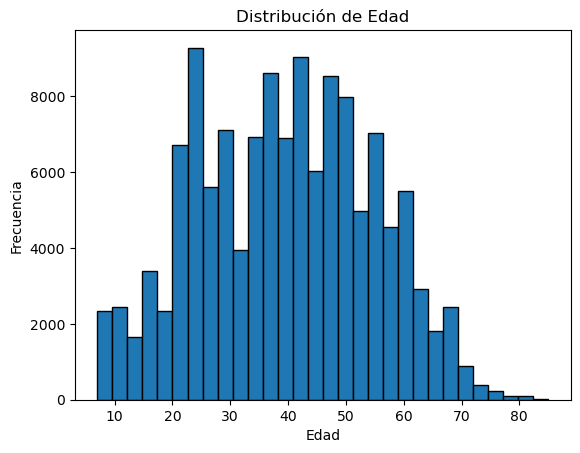

<Figure size 640x480 with 0 Axes>

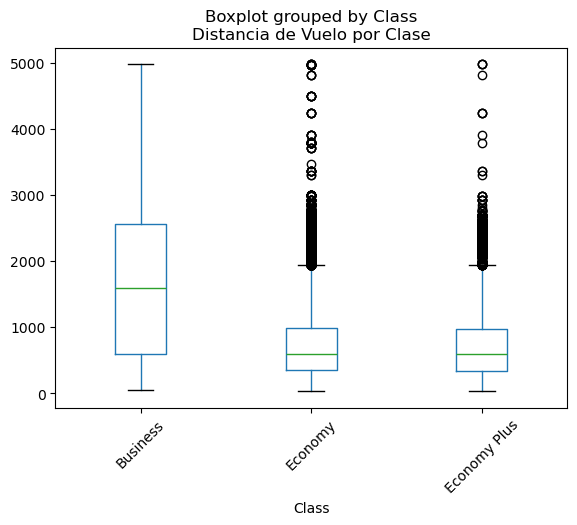

In [68]:
# 👉 PASO 4: Visualizaciones
import matplotlib.pyplot as plt

# TODO: histograma Age
plt.figure()
df['Age'].hist(bins=30, edgecolor='black', grid=False)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.figure()

# TODO: boxplot Flight_Distance por Class

df.boxplot(column='Flight Distance', by='Class', grid=False, rot=45)
plt.title('Distancia de Vuelo por Clase')



In [ ]:
# --- SOLUCIÓN COMENTADA ---
# plt.figure()
# df['Age'].hist(bins=30)
# plt.title("Distribución de Edad")
# plt.figure()
# df.boxplot(column='Flight_Distance', by='Class', rot=45)
# plt.title("Flight Distance por Class")


In [69]:
# Validación: manual (observa las gráficas)
print("✅ Gráficas generadas (revisa visualmente)")

✅ Gráficas generadas (revisa visualmente)


### 💡 Reflexión
¿Qué diferencias ves entre clases económicas y ejecutivas en distancia de vuelo?


## Paso 5 – Correlaciones clave


| Sección | Contenido |
|---------|-----------|
| 📋 **Tarea** | 1. Crea un `DataFrame` `corr_num` con la matriz de correlación de variables numéricas.<br>2. Extrae las 5 mayores correlaciones (absolutas) con `satisfaction` (o la columna equivalente en tu dataset).<br>3. Guarda en `top_corr`. |
| 🧠 **Lógica** | La matriz de correlación señala relaciones lineales; priorizar variables altamente relacionadas ayuda a modelos predictivos de satisfacción. |

In [77]:
# 👉 PASO 5: Correlaciones
# TODO: calcula corr_num y top_corr

num_cols = df.select_dtypes(include=['number']).columns
corr_num = df[num_cols].corr()
target = 'satisfaction' if 'satisfactio' in corr_num.columns else corr_num.columns[-1]
top_corr = corr_num[target].sort_values(ascending=False).head(10)

print("Correlaciones numéricas:")
print(corr_num)


Correlaciones numéricas:
                                              ID       Age  Flight Distance  \
ID                                      1.000000  0.020322         0.095504   
Age                                     0.020322  1.000000         0.099459   
Flight Distance                         0.095504  0.099459         1.000000   
Departure Delay                        -0.017643 -0.009041         0.002402   
Arrival Delay                          -0.035657 -0.011248        -0.001935   
Departure and Arrival Time Convenience -0.002192  0.036960        -0.018914   
Ease of Online Booking                  0.013400  0.022565         0.065165   
Check-in Service                        0.079325  0.033475         0.073608   
Online Boarding                         0.055538  0.207572         0.214825   
Gate Location                          -0.000113 -0.000398         0.005520   
On-board Service                        0.055502  0.057078         0.111194   
Leg Room Service           

In [ ]:
# --- SOLUCIÓN COMENTADA ---
# num_cols = df.select_dtypes('number').columns
# corr_num = df[num_cols].corr()
# target = 'satisfaction' if 'satisfaction' in corr_num.columns else corr_num.columns[-1]
# top_corr = corr_num[target].abs().sort_values(ascending=False).head(6)


In [76]:
# ✅ Validación
assert 'corr_num' in globals(), "corr_num no definido"
print("✅ Correlación calculada")

✅ Correlación calculada


### 💡 Reflexión
¿Alguna variable es sorprendentemente correlacionada (positiva o negativa) con satisfacción?


## Paso 6 – Valores nulos


| Sección | Contenido |
|---------|-----------|
| 📋 **Tarea** | 1. Calcula % de valores nulos por columna (`null_pct`).<br>2. Muestra solo columnas con >1 % de nulos, ordenadas descendentemente.<br>3. Guarda en `null_pct`. |
| 🧠 **Lógica** | Conocer la magnitud de valores faltantes guía estrategias de imputación o eliminación. |

In [82]:
# 👉 PASO 6: Valores faltantes
# TODO: calcula null_pct (>1%)
null_pct = df.isna().mean().mul(100).pipe(lambda s: s[s>1].sort_values(ascending=False))

print("Porcentaje de valores faltantes (>1%):")
print(null_pct)

Porcentaje de valores faltantes (>1%):
Series([], dtype: float64)


In [ ]:
# --- SOLUCIÓN COMENTADA ---
# null_pct = df.isna().mean().mul(100).pipe(lambda s: s[s>1].sort_values(ascending=False))


In [80]:
# ✅ Validación
assert 'null_pct' in globals(), "null_pct no definido"
print("✅ Análisis de nulos listo")

✅ Análisis de nulos listo


### 💡 Reflexión
¿Qué técnicas de imputación usarías para las columnas con >1 % de nulos y por qué?
